In [1]:
pip install nba_api

     |████████████████████████████████| 125 kB 15.3 MB/s 
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=39278f3d1d4a20e540b5a1f61e2bef490ecafa68008f20155a7b44ba8cfe9928
  Stored in directory: /root/.cache/pip/wheels/e3/f4/46/996128675381abc175e306642bae575d372dcf7efc4683e551
Successfully built nba-api


In [2]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

df = leagueleaders.LeagueLeaders().league_leaders.get_data_frame()
pd.set_option('display.max_columns', None)

In [3]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [4]:
print(df.head())

   PLAYER_ID  RANK            PLAYER TEAM  GP   MIN  FGM  FGA  FG_PCT  FG3M  \
0     201939     1     Stephen Curry  GSW  33  1147  294  678   0.434   178   
1    1629027     2        Trae Young  ATL  32  1105  304  672   0.452    86   
2     201142     3      Kevin Durant  BKN  29  1076  315  604   0.522    55   
3    1628378     4  Donovan Mitchell  UTA  33  1091  306  675   0.453   106   
4    1628369     5      Jayson Tatum  BOS  33  1210  295  708   0.417    92   

   FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  \
0   445    0.400  149  162   0.920    20   155  175  197   50   17  112  67   
1   232    0.371  187  209   0.895    25   100  125  300   31    3  128  56   
2   145    0.379  179  204   0.877    14   214  228  165   17   25   94  51   
3   311    0.341  128  146   0.877    30   100  130  170   53    7   98  79   
4   280    0.329  163  198   0.823    37   248  285  124   34   26   94  84   

   PTS  EFF  AST_TOV  STL_TOV  
0  915  845     1.

In [5]:
df['FPA'] = df['FGA']/df['GP']
df['PPG'] = df['PTS']/df['GP']
df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,FPA,PPG
0,201939,1,Stephen Curry,GSW,33,1147,294,678,0.434,178,445,0.400,149,162,0.920,20,155,175,197,50,17,112,67,915,845,1.76,0.45,20.545455,27.727273
1,1629027,2,Trae Young,ATL,32,1105,304,672,0.452,86,232,0.371,187,209,0.895,25,100,125,300,31,3,128,56,881,822,2.34,0.24,21.000000,27.531250
2,201142,3,Kevin Durant,BKN,29,1076,315,604,0.522,55,145,0.379,179,204,0.877,14,214,228,165,17,25,94,51,864,891,1.75,0.18,20.827586,29.793103
3,1628378,4,Donovan Mitchell,UTA,33,1091,306,675,0.453,106,311,0.341,128,146,0.877,30,100,130,170,53,7,98,79,846,721,1.74,0.54,20.454545,25.636364
4,1628369,5,Jayson Tatum,BOS,33,1210,295,708,0.417,92,280,0.329,163,198,0.823,37,248,285,124,34,26,94,84,845,772,1.32,0.36,21.454545,25.606061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,1629674,546,Neemias Queta,SAC,2,9,0,4,0.000,0,0,0.000,0,0,0.000,3,2,5,2,0,1,1,1,0,3,2.00,0.00,2.000000,0.000000
570,1626155,546,Sam Dekker,TOR,1,1,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0.000000
571,1629309,546,Trayvon Palmer,DET,1,17,0,1,0.000,0,0,0.000,0,0,0.000,0,2,2,0,0,0,1,2,0,0,0.00,0.00,1.000000,0.000000
572,1629788,546,Tyler Hall,NYK,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0.000000


In [6]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

fga = df.FGA/df.GP
ppg = df.PTS/df.GP

X = np.array(fga).reshape(-1,1)
y = np.array(ppg).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mean_absolute_error(y_pred, y_test)
#lr.predict([[19]])

1.0255884102472566

**Seaborn and regplot**

In [7]:
!pip install seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


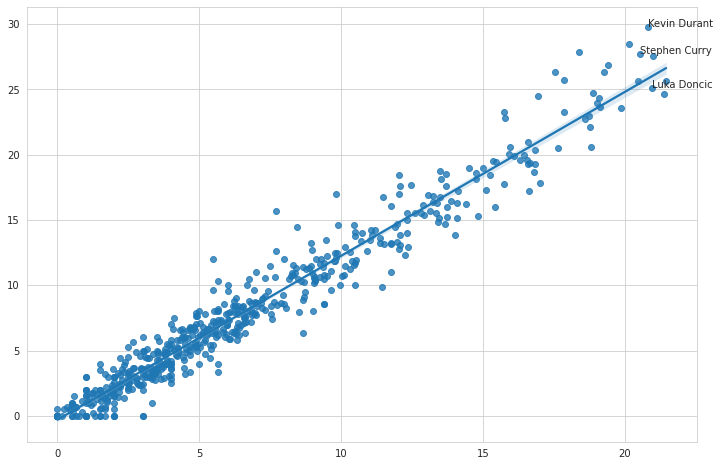

In [10]:
import seaborn as sns

from matplotlib import pyplot as plt; sns.set_style('whitegrid');

# using the object-oriented API for greater control over our plots. Setting figsize on the same line.
fig, ax = plt.subplots(figsize=(12, 8))


fga = df.FGA/df.GP
ppg = df.PTS/df.GP
sns.regplot(fga,ppg,data=df)


# initialize a list of notable player's we'd like to annotate the visualization with.
notable_players = ['Stephen Curry','Luka Doncic','Kevin Durant']

for _, row in df.iterrows():
    if row['PLAYER'] in notable_players: 
        """
        Check our the docs on Axes.text
        
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.text.html
        
        Notice we are using the ax object we instantiated above.
        """
        ax.text(
            x = row['FPA'], # add a bit of spacing from the point in the x-direction
            y = row['PPG'], # same but in the y-direction
            s = row['PLAYER'] # annotate with the player's name
        )

**matplotlib**

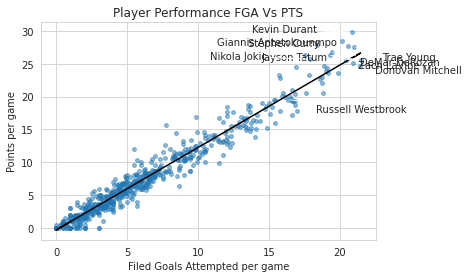

In [9]:
fga = df.FGA/df.GP
ppg = df.PTS/df.GP

x = np.array(fga).reshape(-1,1)
y = np.array(ppg).reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(x,y)

predicted_y = model.predict(x)

plt.scatter(x,y,s=15,alpha=.5)
plt.plot(x,predicted_y,color='black')



for i in range(0,10):
    #How to print Player names
    if(i%2 == 0):
        plt.annotate(df.PLAYER[i],
            (x[i], y[i]),
            (x[i]-7,y[i]),
            arrowprops=dict(arrowstyle='-'))
    else:
        plt.annotate(df.PLAYER[i],
                    (x[i],y[i]),
                    (x[i]+2,y[i]-2),
                    arrowprops=dict(arrowstyle='-'))

        
plt.title('Player Performance FGA Vs PTS')
plt.xlabel('Filed Goals Attempted per game')
plt.ylabel('Points per game')
plt.show()